In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import *
from sklearn.metrics import r2_score
import utils
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.pipeline import make_pipeline
import numpy as np

In [2]:
airbnb = pd.read_csv(
    "../Data/Airbnb_data_categorial.csv",
)

#prediction
airbnb['price'] = np.log(airbnb.price+1)

# Features und Zielvariable trennen
X = airbnb.drop("price", axis=1)  # Alle Spalten außer "price" sind Features
y = airbnb["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# Aufteilung des Trainingsdatensatzes in Trainings- und Validierungsdatensatz (80% Trainingsdaten, 20% Validierungsdaten)
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42
)

# 5. Datennormalisierung
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

# Regression


In [7]:
##Linear Regression Keras
ln = Sequential([Dense(1, input_shape=(X_train.shape[1],), activation='linear')])
ln.compile(optimizer = tf.keras.optimizers.Adam(1e-1), loss = 'mse')
ln.fit(X_train, y_train, batch_size = 100, epochs=500, validation_data=(X_val, y_val))
lr_keras_pred_train= ln.predict(X_train)
lr_keras_pred_test= ln.predict(X_test)

##Linear Regression
lin_reg = make_pipeline(StandardScaler(with_mean=False), LinearRegression())#LinearRegression(normalize = True)
lin_reg.fit(X_train, y_train)
lr_pred_train= lin_reg.predict(X_train)
lr_pred_test= lin_reg.predict(X_test)

#Lasso 
lasso = Lasso(alpha = .1)
lasso.fit(X_train, y_train)
lasso_pred_train= lasso.predict(X_train)
lasso_pred_test = lasso.predict(X_test) 

#Ridge 
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)  
ridge_pred_train= ridge.predict(X_train)
ridge_pred_test = ridge.predict(X_test) 

#Random Forest
rdf = RandomForestRegressor(max_depth=7)
rdf.fit(X_train, y_train) 
rdf_pred_train= rdf.predict(X_train)
rdf_pred_test = rdf.predict(X_test) 

Epoch 1/500
46/46 [==============================] - 0s 3ms/step - loss: 2.6059 - val_loss: 0.4242
Epoch 2/500
46/46 [==============================] - 0s 2ms/step - loss: 0.2646 - val_loss: 0.2331
Epoch 3/500
46/46 [==============================] - 0s 1ms/step - loss: 0.2205 - val_loss: 0.2157
Epoch 4/500
46/46 [==============================] - 0s 1ms/step - loss: 0.2056 - val_loss: 0.2037
Epoch 5/500
46/46 [==============================] - 0s 1ms/step - loss: 0.1958 - val_loss: 0.1947
Epoch 6/500
46/46 [==============================] - 0s 2ms/step - loss: 0.1874 - val_loss: 0.1870
Epoch 7/500
46/46 [==============================] - 0s 2ms/step - loss: 0.1803 - val_loss: 0.1807
Epoch 8/500
46/46 [==============================] - 0s 1ms/step - loss: 0.1746 - val_loss: 0.1760
Epoch 9/500
46/46 [==============================] - 0s 1ms/step - loss: 0.1697 - val_loss: 0.1712
Epoch 10/500
46/46 [==============================] - 0s 2ms/step - loss: 0.1659 - val_loss: 0.1676
Epoch 11/

In [8]:
from utils import print_evaluate

print_evaluate('Linear_Regression Keras', 'test', y_test,lr_keras_pred_test)
print_evaluate('Linear_Regression Keras', 'train', y_train,lr_keras_pred_train)

print_evaluate('Linear_Regression', 'test', y_test,lr_pred_test)
print_evaluate('Linear_Regression', 'train', y_train,lr_pred_train)

print_evaluate('Lasso', 'test',y_test, lasso_pred_test)
print_evaluate('Lasso', 'train',y_train, lasso_pred_train)

print_evaluate('Ridge', 'test',y_test, ridge_pred_test)
print_evaluate('Ridge', 'train',y_train, ridge_pred_train)

print_evaluate('Radnom Forest', 'test',y_test, rdf_pred_test)
print_evaluate('Radnom Forest', 'train',y_train, rdf_pred_train)

print_evaluate('Radnom Forest', 'test',y_test, rdf_pred_test)
print_evaluate('Radnom Forest', 'train',y_train, rdf_pred_train)

Linear_Regression Keras test
MAE: 0.2936405325185004
MSE: 0.1377887058322381
RMSE: 0.3711990110873655
R2 Square 0.6524078228276353
__________________________________
Linear_Regression Keras train
MAE: 0.2940614025735355
MSE: 0.13758277097427468
RMSE: 0.37092151592253947
R2 Square 0.6504613145344771
__________________________________
Linear_Regression test
MAE: 0.28573768011020556
MSE: 0.13246725390283026
RMSE: 0.3639605114608318
R2 Square 0.6658319641655547
__________________________________
Linear_Regression train
MAE: 0.2858292544208227
MSE: 0.13245448455891112
RMSE: 0.3639429688274127
R2 Square 0.6634900860850372
__________________________________
Lasso test
MAE: 0.4339357905488548
MSE: 0.2870271210667973
RMSE: 0.5357491213868645
R2 Square 0.2759320779121406
__________________________________
Lasso train
MAE: 0.433236551756537
MSE: 0.28454035366356606
RMSE: 0.5334232406481424
R2 Square 0.27710526196587093
__________________________________
Ridge test
MAE: 0.28600921190322803
MSE: 0.

### Analize which features are importend

In [9]:
important_features_dict = {}
for idx, val in enumerate(rdf.feature_importances_):
    important_features_dict[idx] = val

important_features_list = sorted(important_features_dict,
                                 key=important_features_dict.get,
                                 reverse=True)
for i in important_features_list:
    print(i,X.columns[i],important_features_dict[i])

17 room_type 0.3449646424748599
55 bathroom_type 0.256925728394054
15 longitude 0.12767056765083165
14 latitude 0.047379672022748745
54 bathroom_number 0.03884630929142162
19 bedrooms 0.0326618923133865
16 property_type 0.030991879596972378
18 accommodates 0.02333171131885046
23 minimum_minimum_nights 0.02114517750288613
21 minimum_nights 0.0178972573785231
27 minimum_nights_avg_ntm 0.01294741055822309
7 host_listings_count 0.005879384464790864
32 availability_90 0.005115582511231621
31 availability_60 0.0035223419415863237
30 availability_30 0.003217471483898998
50 calculated_host_listings_count_private_rooms 0.0029414939568222515
48 calculated_host_listings_count 0.0028299798507038813
51 calculated_host_listings_count_shared_rooms 0.002493660446944478
20 beds 0.0020058875528486085
22 maximum_nights 0.001758848223622247
39 last_review 0.001590939067006306
24 maximum_minimum_nights 0.0013479185381905035
40 review_scores_rating 0.0012527726778370993
57 distance_to_nearest_subway_station

<Axes: xlabel='Price', ylabel='PredictedPrice'>

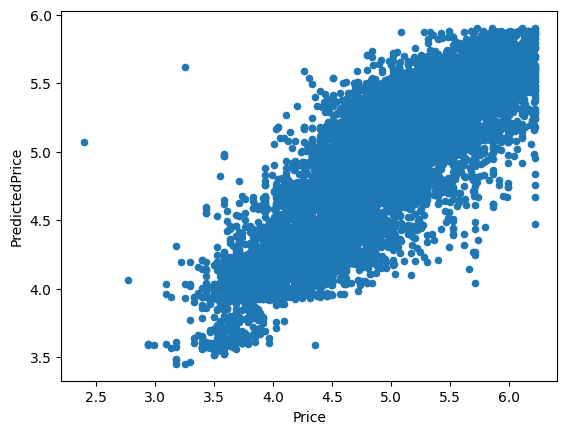

In [10]:
pd.DataFrame({'Price': y_test, 'PredictedPrice': rdf_pred_test}).plot.scatter(x='Price', y='PredictedPrice')